In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

df_dummy_static = pd.read_csv("df_dummies.csv",index_col=0 )
df_factors_beahv = pd.read_csv("df_4_factors.csv" , index_col=0)

In [67]:
df_dummy_static = df_dummy_static.reset_index()
value_serial_no = df_factors_beahv['serial_no']
df_dummy_static.insert(loc=0, column='serial_no', value=value_serial_no)

del df_dummy_static["index"]

In [68]:
data = df_dummy_static.merge(df_factors_beahv)

# hierarical clustering on factors data 

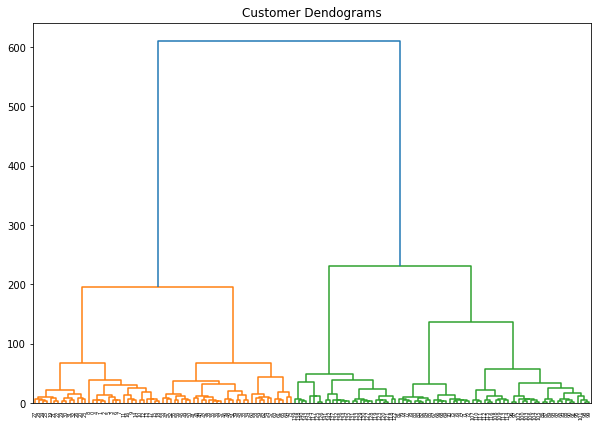

In [69]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [93]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

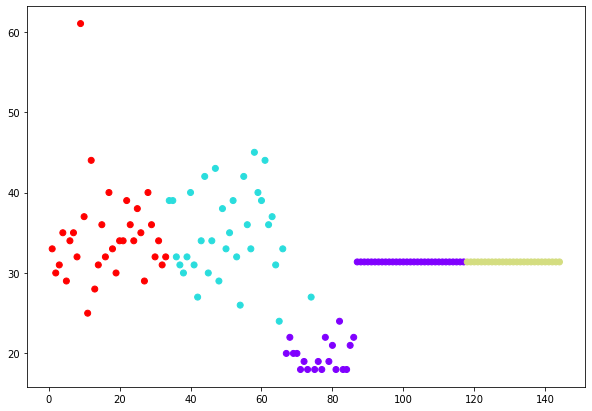

In [94]:
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster.labels_, cmap='rainbow')

## PCA on 52 questions data 

In [185]:
from sklearn.preprocessing import StandardScaler

### convert age to categorical 

In [186]:
df_dummy_static['Age'] = pd.to_numeric(df_dummy_static['Age'], errors='coerce')

df_dummy_static['Age'] = pd.cut(x=df_dummy_static['Age'], bins=[17, 29, 39, 49 , 59 , 69], labels=['20', '30', '40' , '50' , '60'])

df_dummy_static['Age'].value_counts()

30    105
20     28
40     10
60      1
50      0
Name: Age, dtype: int64

### remove age categories with less counts 

In [187]:
df_filtered = df_dummy_static[df_dummy_static['Age']!="50"] 
print(df_dummy_static.index[df_dummy_static['Age']=="50"].tolist())
df_filtered = df_filtered[df_filtered['Age']!="60"] 
print(df_dummy_static.index[df_dummy_static['Age']=="60"].tolist())

[]
[8]


###  Target will keep changing 

In [188]:
y = df_dummy_static.loc[:,['Age']].values

In [189]:
df_questions = pd.read_csv("df_merged_sets.csv" , index_col=0)

In [190]:
del df_questions['Unnamed: 0.1']

In [191]:
df_questions.shape

(144, 52)

In [192]:
x = df_questions.values
x = StandardScaler().fit_transform(x)
# x

/home/aayushe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/aayushe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [194]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=2)
principalComponents = pca_1.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [195]:
principalDf.head(5)

,principal component 1,principal component 2
0,4.500974,0.778822
1,-5.324983,3.492560
2,0.092867,2.154803
3,0.913218,1.593778
4,3.498523,0.938011


In [196]:
df_target = pd.DataFrame(data=y, columns=["Age"])


In [197]:

finalDf = pd.concat([principalDf, df_target], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Age
0,4.500974,0.778822,30
1,-5.324983,3.492560,30
2,0.092867,2.154803,30
3,0.913218,1.593778,30
4,3.498523,0.938011,20


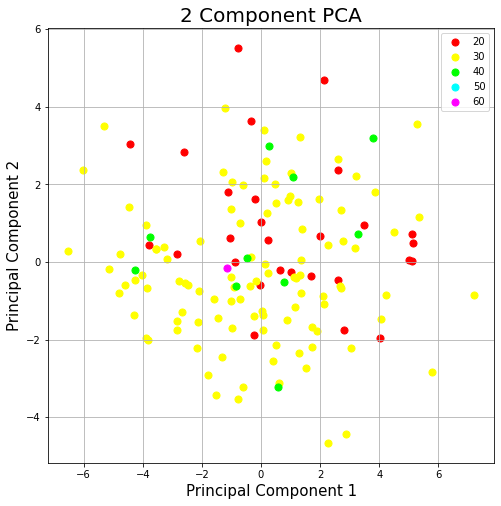

In [198]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['20', '30', '40' , '50' , '60']
colors = ['#FF0000' , '#FFFF00' , '#00FF00' ,'#00FFFF' , '#FF00FF']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Age'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### The Variance Explained by the principal component analysis is only 21%  which hints we would be better off exploring and taking into account more dimension , Looking at the PCA, for instance in dimension 2, we can see that there is a group of variables that we will be able to see them in more detail later on, that are very negatively correlated (as represented by the opposite arrows)

In [199]:
pca_1.explained_variance_ratio_

array([0.1452687 , 0.06581464])

### PCA biplot 

In [180]:
Se_targets = pd.Series(df_target['Age'],name = "Age")
# Se_targets

In [181]:
# Color classes
color_list = [{"20":"#FF0000","30":"#FFFF00","40":"#00FF00" , "50":"#00FFFF" , "60":"#FF00FF"}[x] for x in Se_targets]

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [52] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


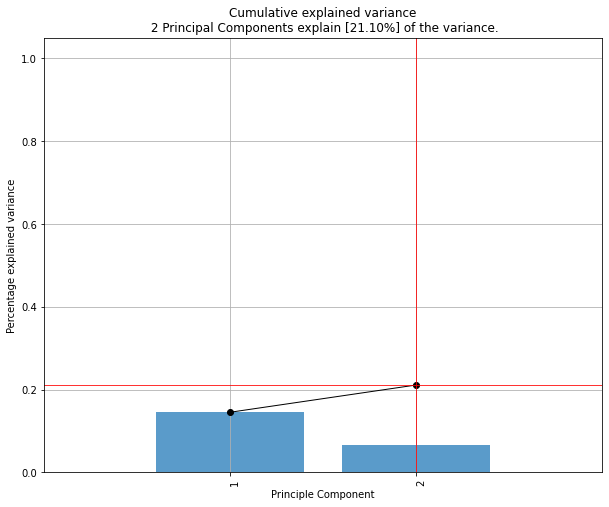

<Figure size 432x288 with 0 Axes>

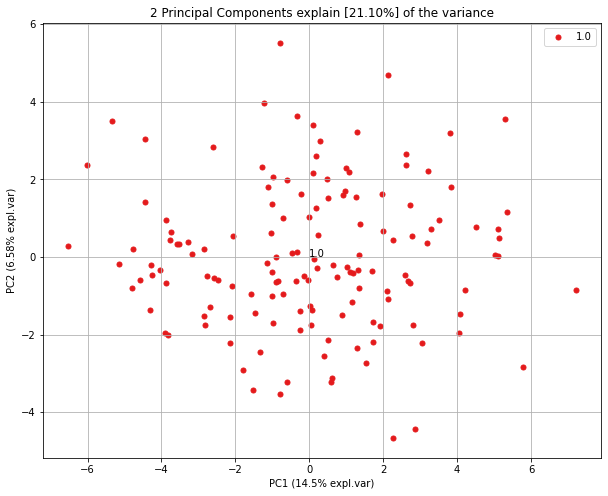

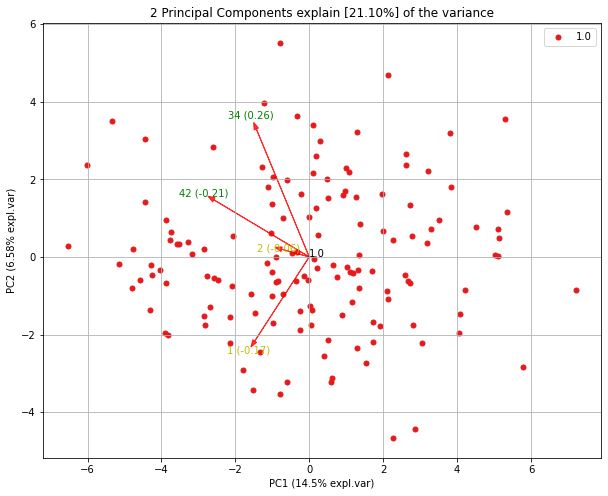

In [182]:

from pca import pca
# colors = ['#FF0000' , '#FFFF00' , '#00FF00' ,'#00FFFF' , '#FF00FF']

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(x)


# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

ax.scatter(x=finalDf["principal component 1"], y=finalDf["principal component 2"], color=color_list)

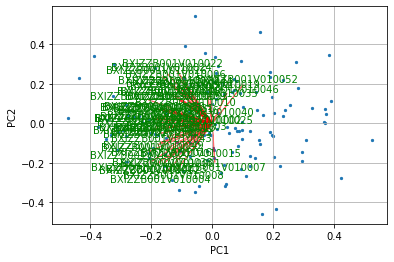

In [201]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(principalComponents[:,0:2],np.transpose(pca_1.components_[0:2, :]),list(df_questions.columns))
plt.show()